Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


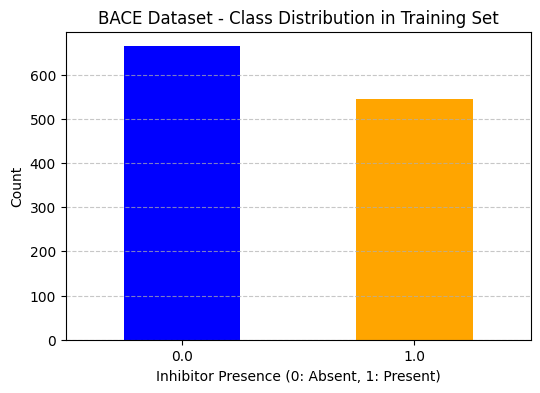

Train Dataset: 1210 samples
Validation Dataset: 151 samples
Test Dataset: 152 samples


In [ ]:
import os
import deepchem as dc
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the directory exists
data_dir = "./bace_data"
save_dir = "./bace_saved"

os.makedirs(data_dir, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# Load BACE dataset
tasks, datasets, transformers = dc.molnet.load_bace_classification(
    featurizer="ECFP",   
    splitter="random",    
    reload=True,         
    data_dir=data_dir,  
    save_dir=save_dir  
)

train_dataset, valid_dataset, test_dataset = datasets

# Convert dataset to DataFrame
train_df = pd.DataFrame(train_dataset.X)
train_df['Class'] = train_dataset.y  # Add labels

# Plot class distribution
plt.figure(figsize=(6, 4))
train_df['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Inhibitor Presence (0: Absent, 1: Present)")
plt.ylabel("Count")
plt.title("BACE Dataset - Class Distribution in Training Set")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# Print dataset sizes
print(f"Train Dataset: {len(train_dataset)} samples")
print(f"Validation Dataset: {len(valid_dataset)} samples")
print(f"Test Dataset: {len(test_dataset)} samples")


In [4]:
import numpy as np

# Convert dataset to DataFrame
train_df = pd.DataFrame({
    'SMILES': np.array(train_dataset.ids).flatten(),  # Ensure it's 1D
    'Class': np.array(train_dataset.y).flatten()  # Ensure it's 1D
})

# Display the first few rows
print(train_df.head())


                                              SMILES  Class
0  O(C)c1cc(ccc1)C[NH2+]CC(O)C(NC(=O)c1c2c(n(c1)C...    0.0
1  Fc1ccc(cc1OCCCCF)[C@]1(N=C(N)N(C)C1=O)c1ccc(OC...    1.0
2  s1cc(cc1)C1(N=C(N)N(C)C1=O)c1cc(ccc1)-c1cc(OC)...    1.0
3  O=C1N(C)C(=NC(C1)(C)C1CC1c1cc(ccc1)-c1cc(ccc1)...    0.0
4  Clc1cc(cnc1)-c1cc2c(CC(CC23N=C(N)N(C)C3=O)(C)C...    1.0


In [9]:
import pandas as pd
import numpy as np

# Convert dataset to DataFrame
train_df = pd.DataFrame({
    'SMILES': np.array(train_dataset.ids).flatten(),  # Ensure it's 1D
    'Class': np.array(train_dataset.y).flatten()  # Ensure it's 1D
})

# Display full dataset properly
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)  # Adjust max rows to display
pd.set_option('display.width', 1000)  # Increase width to avoid line breaks

# Display DataFrame in Jupyter notebook
from IPython.display import display
display(train_df)

# For terminal users, print full table
print(train_df.to_string(index=False))


,SMILES,Class
0,S(=O)(=O)(N(C)c1cc(cc(c1)C(=O)NC(C(O)CC(OC)C[N...,0.0
1,S1(=O)CC(Cc2cc(OC(COC)C(F)(F)F)c(N)c(F)c2)C(O)...,1.0
2,O=C1N(CC(=NC1(C)c1cc(NC(=O)c2ncc(cc2)C#N)ccc1)N)C,0.0
3,S(=O)(=O)(N(C)c1cc2cc(NCCCCOc3cc(CC(NC2=O)C(O)...,1.0
4,O1c2ncc(cc2C([NH2+]CC(O)C(NC(=O)COC)Cc2cc(ccc2...,1.0
...,...,...
1205,Fc1ccncc1-c1cc(ccc1)C1(N=C(OC1)N)c1ccc(OC)cc1,0.0
1206,FC(F)(F)c1ccc(cc1)\C=C\C(=O)N[C@@H](Cc1ccccc1)...,0.0
1207,s1c2OC(C[C@H]([NH2+]C[C@@H](O)[C@@H](NC(=O)C)C...,1.0
1208,Clc1cc(ccc1OCCCC)CSC(=[NH2+])N,0.0


                                                                                                                                                                                                SMILES  Class
                                                                                                     S(=O)(=O)(N(C)c1cc(cc(c1)C(=O)NC(C(O)CC(OC)C[NH2+]Cc1ccccc1)COc1cc(F)cc(F)c1)C(=O)NC(C)c1ccccc1)C    0.0
                                                                                                                         S1(=O)CC(Cc2cc(OC(COC)C(F)(F)F)c(N)c(F)c2)C(O)C([NH2+]Cc2cc(ccc2F)C(C)(C)C)C1    1.0
                                                                                                                                                     O=C1N(CC(=NC1(C)c1cc(NC(=O)c2ncc(cc2)C#N)ccc1)N)C    0.0
                                                                                                               S(=O)(=O)(N(C)c1cc2cc(NCCCCOc3cc(CC(NC2=O)C(O)C[NH2+]C2(CC2)c2cc(

In [11]:
import deepchem as dc
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure directories exist
data_dir = "./bace_data"
save_dir = "./bace_saved"
os.makedirs(data_dir, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# Load BACE dataset with ECFP fingerprints
tasks, datasets, transformers = dc.molnet.load_bace_classification(
    featurizer="ECFP",  # Extended Connectivity Fingerprints
    splitter="random",  # Random splitting of data
    reload=True,
    data_dir=data_dir,
    save_dir=save_dir
)

# Unpack datasets
train_dataset, valid_dataset, test_dataset = datasets

# Extract features (X) and labels (y)
X_train, y_train = train_dataset.X, train_dataset.y.flatten()
X_valid, y_valid = valid_dataset.X, valid_dataset.y.flatten()
X_test, y_test = test_dataset.X, test_dataset.y.flatten()

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8553
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        78
         1.0       0.85      0.85      0.85        74

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152



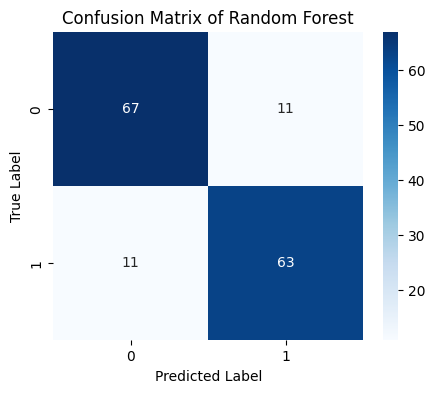

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Random Forest")
plt.show()

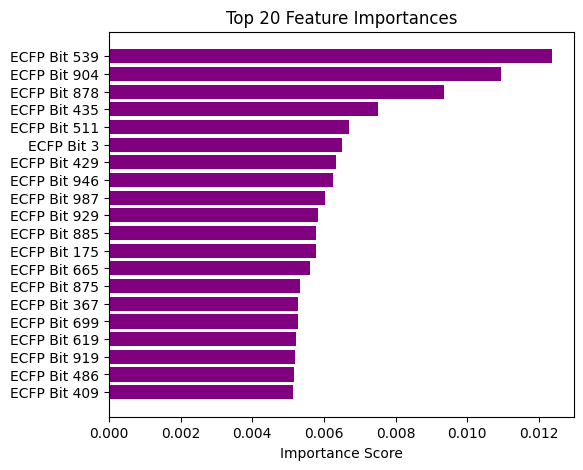

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = rf_model.feature_importances_

# Get top 20 important features
top_features = np.argsort(feature_importance)[-20:]

# Generate feature names based on ECFP bit indices
feature_names = [f"ECFP Bit {i}" for i in range(X_train.shape[1])]

# Plot feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(20), feature_importance[top_features], color="purple")
plt.yticks(range(20), [feature_names[i] for i in top_features])  # Use actual bit indices
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances")
plt.show()


In [2]:
import deepchem as dc
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Ensure directories exist
data_dir = "./bace_data"
save_dir = "./bace_saved"
os.makedirs(data_dir, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# Load BACE dataset with ECFP fingerprints
tasks, datasets, transformers = dc.molnet.load_bace_classification(
    featurizer="ECFP",  # Extended Connectivity Fingerprints
    splitter="random",  # Random split
    reload=True,
    data_dir=data_dir,
    save_dir=save_dir
)

# Unpack datasets
train_dataset, valid_dataset, test_dataset = datasets

# Extract features (X) and labels (y)
X_train, y_train = train_dataset.X, train_dataset.y.flatten()
X_valid, y_valid = valid_dataset.X, valid_dataset.y.flatten()
X_test, y_test = test_dataset.X, test_dataset.y.flatten()

# Handle class imbalance using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape for 1D CNN (samples, timesteps, features)
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define Optimized 1D CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),  # Increased dropout

    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),  # Increased dropout
    Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled, 
    validation_data=(X_valid, y_valid), 
    epochs=50, batch_size=32, 
    class_weight=class_weights_dict,  # Handling class imbalance
    # callbacks=[early_stopping]
)

# Evaluate on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5687 - loss: 2.8644 - val_accuracy: 0.7285 - val_loss: 1.3263
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7693 - loss: 1.1705 - val_accuracy: 0.7550 - val_loss: 1.0000
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7607 - loss: 0.9381 - val_accuracy: 0.7616 - val_loss: 0.8646
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7811 - loss: 0.8068 - val_accuracy: 0.7616 - val_loss: 0.7538
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8106 - loss: 0.6921 - val_accuracy: 0.7682 - val_loss: 0.7353
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8084 - loss: 0.6578 - val_accuracy: 0.7682 - val_loss: 0.7071
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8226 - loss: 0.6333 - val_accuracy: 0.7483 - val_loss: 0.6779
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8205 - loss: 0.6099 - val_accuracy: 0.7748 - val_loss: 0.

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 1022, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 511, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 511, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 509, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 254, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 254, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32512)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,161,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,560,261 (47.91 MB)

 Trainable params: 4,186,753 (15.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,373,508 (31.94 MB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


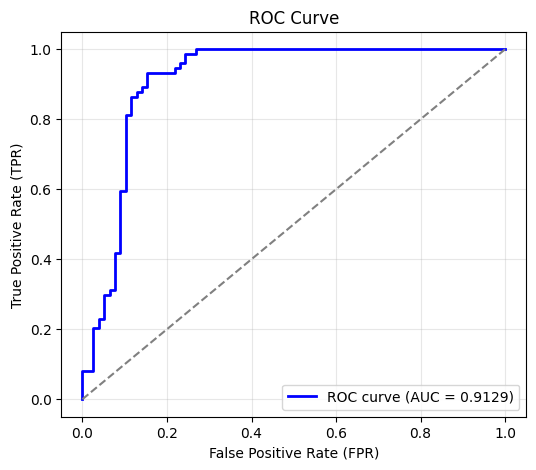

In [6]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
y_probs = model.predict(X_test).flatten()  # Get probability scores
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


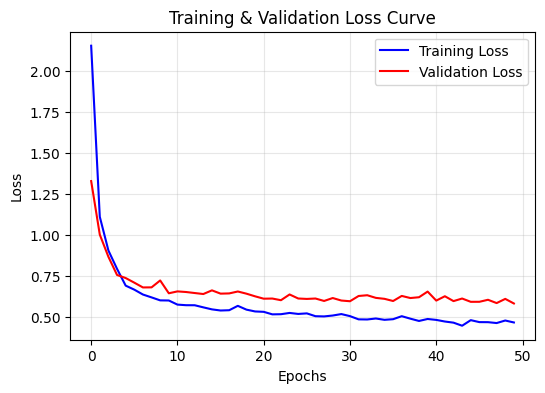

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss curves
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label="Training Loss", color="blue")
plt.plot(history.history['val_loss'], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


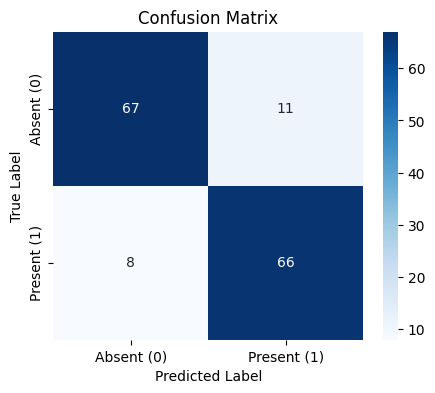

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Absent (0)", "Present (1)"], yticklabels=["Absent (0)", "Present (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


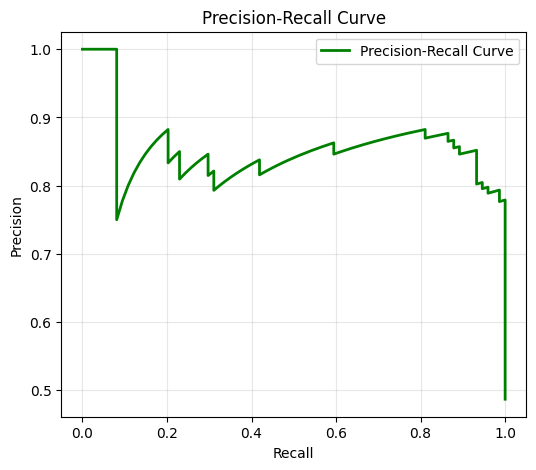

In [13]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
